In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('../Details/dataset/train.csv')
test  = pd.read_csv('../Details/dataset/test.csv')

In [4]:
train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [6]:
train.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [7]:
# pp.ProfileReport(train)

In [8]:
train.isnull().sum()/train.shape[0]

customer_id                     0.000000
Name                            0.000000
age                             0.000000
gender                          0.000000
security_no                     0.000000
region_category                 0.146734
membership_category             0.000000
joining_date                    0.000000
joined_through_referral         0.000000
referral_id                     0.000000
preferred_offer_types           0.007785
medium_of_operation             0.000000
internet_option                 0.000000
last_visit_time                 0.000000
days_since_last_login           0.000000
avg_time_spent                  0.000000
avg_transaction_value           0.000000
avg_frequency_login_days        0.000000
points_in_wallet                0.093074
used_special_discount           0.000000
offer_application_preference    0.000000
past_complaint                  0.000000
complaint_status                0.000000
feedback                        0.000000
churn_risk_score

In [9]:
for i in train.columns:
    print("{} -- {}".format(i, train[i].nunique()))

customer_id -- 36992
Name -- 36992
age -- 55
gender -- 3
security_no -- 36992
region_category -- 3
membership_category -- 6
joining_date -- 1096
joined_through_referral -- 3
referral_id -- 11359
preferred_offer_types -- 3
medium_of_operation -- 4
internet_option -- 3
last_visit_time -- 30101
days_since_last_login -- 27
avg_time_spent -- 25961
avg_transaction_value -- 36894
avg_frequency_login_days -- 1654
points_in_wallet -- 23699
used_special_discount -- 2
offer_application_preference -- 2
past_complaint -- 2
complaint_status -- 5
feedback -- 9
churn_risk_score -- 6


In [10]:
train['customer_id'].isin(train['referral_id']).sum()

0

In [11]:
train['churn_risk_score'].value_counts()

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64

In [12]:
train['region_category'].value_counts()

Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64

In [13]:
train['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

D:\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='points_in_wallet'>

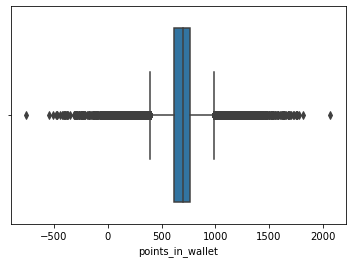

In [14]:
sns.boxplot(train['points_in_wallet'])

In [15]:
train['membership_category'].value_counts()

Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: membership_category, dtype: int64

In [16]:
train['internet_option'].value_counts()

Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64

In [17]:
train['joined_through_referral'].value_counts()

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64

In [18]:
train['medium_of_operation'].value_counts()

Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64

D:\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='avg_time_spent'>

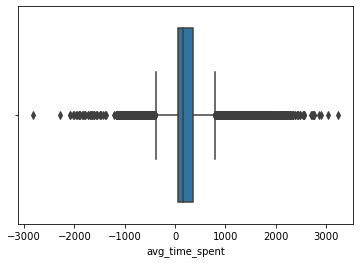

In [19]:
sns.boxplot(train['avg_time_spent'])

D:\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='avg_transaction_value'>

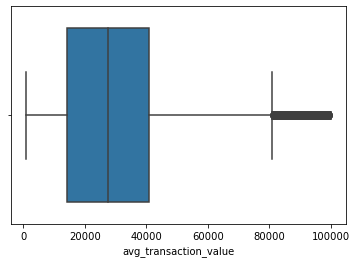

In [20]:
sns.boxplot(train['avg_transaction_value'])

In [21]:
train['offer_application_preference'].value_counts()

Yes    20440
No     16552
Name: offer_application_preference, dtype: int64

In [22]:
train['used_special_discount'].value_counts()

Yes    20342
No     16650
Name: used_special_discount, dtype: int64

In [23]:
train.groupby(['region_category', 'membership_category'])['customer_id'].count()

region_category  membership_category
City             Basic Membership       2694
                 Gold Membership        2387
                 No Membership          2672
                 Platinum Membership    1440
                 Premium Membership     1514
                 Silver Membership      2030
Town             Basic Membership       2942
                 Gold Membership        2520
                 No Membership          2941
                 Platinum Membership    1693
                 Premium Membership     1662
                 Silver Membership      2370
Village          Basic Membership        926
                 Gold Membership         881
                 No Membership           927
                 Platinum Membership     585
                 Premium Membership      627
                 Silver Membership       753
Name: customer_id, dtype: int64

In [24]:
train.groupby(['region_category', 'membership_category', 'preferred_offer_types'])['customer_id'].count()

region_category  membership_category  preferred_offer_types   
City             Basic Membership     Credit/Debit Card Offers     871
                                      Gift Vouchers/Coupons        856
                                      Without Offers               945
                 Gold Membership      Credit/Debit Card Offers     732
                                      Gift Vouchers/Coupons        865
                                      Without Offers               773
                 No Membership        Credit/Debit Card Offers     879
                                      Gift Vouchers/Coupons        857
                                      Without Offers               918
                 Platinum Membership  Credit/Debit Card Offers     492
                                      Gift Vouchers/Coupons        501
                                      Without Offers               434
                 Premium Membership   Credit/Debit Card Offers     510
              

In [25]:
train.groupby(['region_category', 'preferred_offer_types'])['customer_id'].count()

region_category  preferred_offer_types   
City             Credit/Debit Card Offers    4166
                 Gift Vouchers/Coupons       4266
                 Without Offers              4203
Town             Credit/Debit Card Offers    4742
                 Gift Vouchers/Coupons       4657
                 Without Offers              4626
Village          Credit/Debit Card Offers    1568
                 Gift Vouchers/Coupons       1615
                 Without Offers              1482
Name: customer_id, dtype: int64

In [26]:
train.groupby(['region_category'])['avg_transaction_value'].mean()

region_category
City       29113.498927
Town       29105.414562
Village    30473.511647
Name: avg_transaction_value, dtype: float64

In [27]:
train.groupby(['region_category'])['avg_transaction_value'].mean()

region_category
City       29113.498927
Town       29105.414562
Village    30473.511647
Name: avg_transaction_value, dtype: float64

In [28]:
train.pivot_table(values='avg_transaction_value', index='membership_category', columns='region_category', aggfunc='mean')

region_category,City,Town,Village
membership_category,,,
Basic Membership,25251.574484,25149.255707,25465.839546
Gold Membership,31029.502782,30343.957857,32654.907650
No Membership,25024.338664,25630.494539,25265.812557
Platinum Membership,35406.498444,35305.889138,36365.285487
Premium Membership,34807.318164,35340.720499,37757.849442
Silver Membership,28657.537271,28209.696464,29847.833094


In [29]:
train.pivot_table(values='points_in_wallet', index='membership_category', columns='region_category', aggfunc='mean')

region_category,City,Town,Village
membership_category,,,
Basic Membership,620.285410,619.385697,635.413994
Gold Membership,720.761582,728.639188,728.212672
No Membership,621.944524,622.093283,615.954795
Platinum Membership,757.564796,760.765722,761.545267
Premium Membership,754.223383,748.566193,767.716579
Silver Membership,714.130736,714.438923,711.886888


In [30]:
train.pivot_table(values='avg_time_spent', index='membership_category', columns='region_category', aggfunc='mean')

region_category,City,Town,Village
membership_category,,,
Basic Membership,229.022819,240.806194,237.630324
Gold Membership,251.880280,247.243086,250.711293
No Membership,235.439013,241.621600,257.365075
Platinum Membership,255.503157,253.358840,224.151693
Premium Membership,249.490617,249.976315,262.864951
Silver Membership,241.730296,240.642991,249.441455


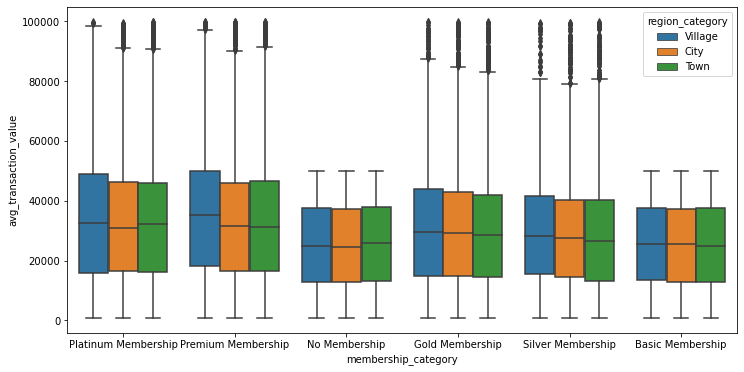

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(x='membership_category', y='avg_transaction_value', hue='region_category', data=train)
plt.show()

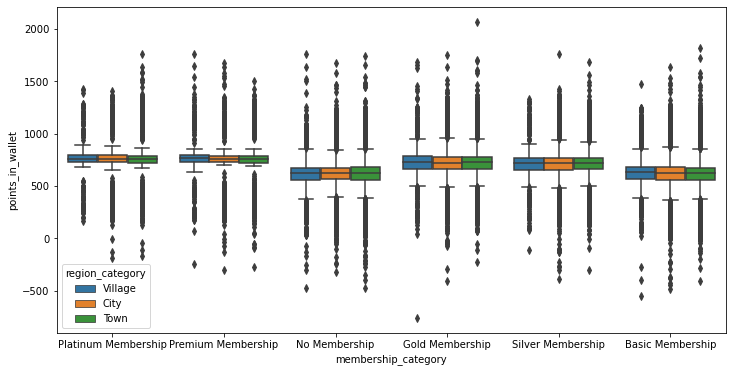

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(x='membership_category', y='points_in_wallet', hue='region_category', data=train)
plt.show()

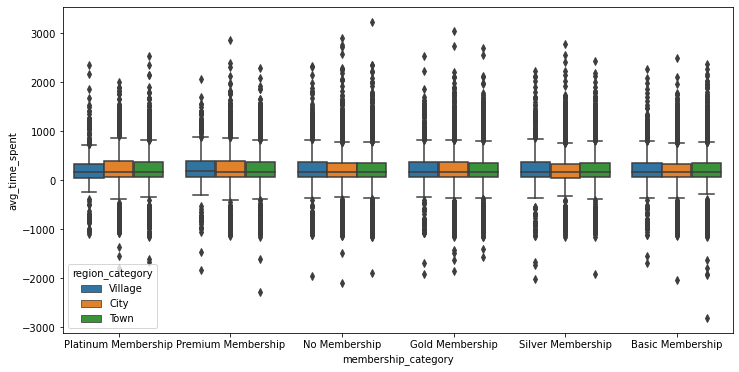

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(x='membership_category', y='avg_time_spent', hue='region_category', data=train)
plt.show()

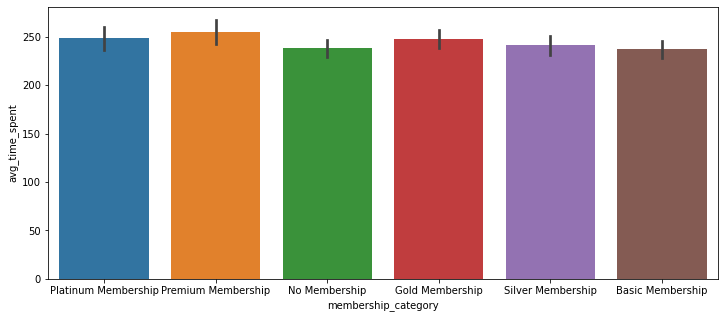

In [34]:
plt.figure(figsize=(12,5))
sns.barplot(x='membership_category', y='avg_time_spent', data=train, estimator=np.mean)
plt.show()

In [35]:
train.groupby('membership_category')['avg_transaction_value'].mean()

membership_category
Basic Membership       25235.326221
Gold Membership        31058.701054
No Membership          25363.630116
Platinum Membership    35347.613898
Premium Membership     35348.589235
Silver Membership      28544.675716
Name: avg_transaction_value, dtype: float64

<AxesSubplot:>

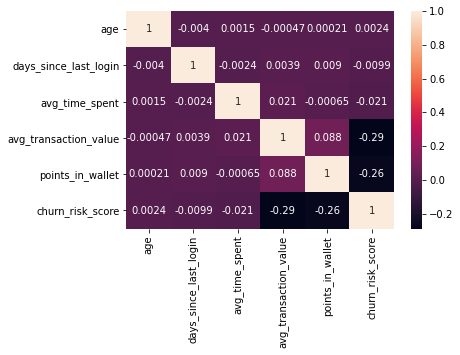

In [36]:
cor = train.corr()
sns.heatmap(cor, annot=True)

In [37]:
df = train[~train.preferred_offer_types.isnull()]
df.shape

(36704, 25)

In [38]:
df.isnull().sum()/df.shape[0]

customer_id                     0.000000
Name                            0.000000
age                             0.000000
gender                          0.000000
security_no                     0.000000
region_category                 0.146551
membership_category             0.000000
joining_date                    0.000000
joined_through_referral         0.000000
referral_id                     0.000000
preferred_offer_types           0.000000
medium_of_operation             0.000000
internet_option                 0.000000
last_visit_time                 0.000000
days_since_last_login           0.000000
avg_time_spent                  0.000000
avg_transaction_value           0.000000
avg_frequency_login_days        0.000000
points_in_wallet                0.093069
used_special_discount           0.000000
offer_application_preference    0.000000
past_complaint                  0.000000
complaint_status                0.000000
feedback                        0.000000
churn_risk_score

In [39]:
df['complaint_status'].value_counts()

Not Applicable              18446
Unsolved                     4615
Solved                       4579
Solved in Follow-up          4542
No Information Available     4522
Name: complaint_status, dtype: int64

In [40]:
df['medium_of_operation'].value_counts()

Desktop       13806
Smartphone    13766
?              5348
Both           3784
Name: medium_of_operation, dtype: int64

In [41]:
df['medium_of_operation'].replace({'?': 'Unknown'}, inplace=True)

D:\Programs\Anaconda\lib\site-packages\pandas\core\series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [42]:
df['feedback'].value_counts()

Poor Product Quality        6304
No reason specified         6234
Too many ads                6230
Poor Website                6226
Poor Customer Service       6195
Reasonable Price            1408
User Friendly Website       1382
Products always in Stock    1371
Quality Customer Care       1354
Name: feedback, dtype: int64

In [43]:
# pred_rc = df[['member']]

In [44]:
def dummy_encoding(col, df):
    for i in col:
        dummies = pd.get_dummies(df[i])
#         print(i, dummies.columns)
        col_list = [i+'_'+x for x in dummies.columns]
        dummies.columns = col_list
        df = pd.concat([df, dummies], axis=1)
        df.drop([i], axis=1, inplace=True)
#         print(df.shape)
    return df

In [45]:
enc_col = ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types',
        'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 
        'complaint_status', 'feedback']

In [46]:
df = dummy_encoding(enc_col, df)
df.head(2)

gender Index(['F', 'M', 'Unknown'], dtype='object')
(36704, 27)
region_category Index(['City', 'Town', 'Village'], dtype='object')
(36704, 29)
membership_category Index(['Basic Membership', 'Gold Membership', 'No Membership',
       'Platinum Membership', 'Premium Membership', 'Silver Membership'],
      dtype='object')
(36704, 34)
joined_through_referral Index(['?', 'No', 'Yes'], dtype='object')
(36704, 36)
preferred_offer_types Index(['Credit/Debit Card Offers', 'Gift Vouchers/Coupons', 'Without Offers'], dtype='object')
(36704, 38)
medium_of_operation Index(['Both', 'Desktop', 'Smartphone', 'Unknown'], dtype='object')
(36704, 41)
internet_option Index(['Fiber_Optic', 'Mobile_Data', 'Wi-Fi'], dtype='object')
(36704, 43)
used_special_discount Index(['No', 'Yes'], dtype='object')
(36704, 44)
offer_application_preference Index(['No', 'Yes'], dtype='object')
(36704, 45)
past_complaint Index(['No', 'Yes'], dtype='object')
(36704, 46)
complaint_status Index(['No Information Available', 'No

,customer_id,Name,age,security_no,joining_date,referral_id,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,gender_F,gender_M,gender_Unknown,region_category_City,region_category_Town,region_category_Village,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_?,joined_through_referral_No,joined_through_referral_Yes,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,medium_of_operation_Unknown,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_No,used_special_discount_Yes,offer_application_preference_No,offer_application_preference_Yes,past_complaint_No,past_complaint_Yes,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,fffe4300490044003600300030003800,Pattie Morrisey,18,XW0DQ7H,2017-08-17,xxxxxxxx,16:08:02,17,300.63,53005.25,17.0,781.75,2,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,fffe43004900440032003100300035003700,Traci Peery,32,5K0N3X1,2017-08-28,CID21329,12:38:13,16,306.34,12838.38,10.0,NaN,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [47]:
df['referral_status'] = df['referral_id'].apply(lambda x: 0 if x=='xxxxxxxx' else 1)

In [48]:
df['referral_status'].value_counts()

1    18982
0    17722
Name: referral_status, dtype: int64

In [49]:
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].apply(lambda x: 0 if x=='Error' else x)
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].astype('float')
df['avg_frequency_login_days'].dtype

dtype('float64')

In [52]:
df['points_in_wallet'].describe()

count    33288.000000
mean       686.919871
std        193.947572
min       -760.661236
25%        616.075000
50%        697.665000
75%        763.955000
max       2069.069761
Name: points_in_wallet, dtype: float64

## Processing Test Data

In [ ]:
test_df = dummy_encoding(enc_col, test)

In [140]:
test_df['referral_status'] = test_df['referral_id'].apply(lambda x: 0 if x=='xxxxxxxx' else 1)
test_df['avg_frequency_login_days'] = test_df['avg_frequency_login_days'].apply(lambda x: 0 if x=='Error' else x)
test_df['avg_frequency_login_days'] = test_df['avg_frequency_login_days'].astype('float')
test_df['avg_frequency_login_days'].dtype

dtype('float64')

In [142]:
test_df = test_df.drop(['customer_id', 'Name', 'security_no', 'joining_date', 'referral_id', 'last_visit_time'], axis=1)
test_df.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,gender_F,gender_M,gender_Unknown,region_category_City,region_category_Town,region_category_Village,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_?,joined_through_referral_No,joined_through_referral_Yes,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_?,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_No,used_special_discount_Yes,offer_application_preference_No,offer_application_preference_Yes,past_complaint_No,past_complaint_Yes,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,referral_status
0,50,12,386.26,40721.44,7.0,733.830000,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,41,11,37.80,9644.40,9.0,726.000000,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,31,18,215.36,3693.25,21.0,713.780000,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,64,-999,44.57,36809.56,11.0,744.970000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,16,6,349.88,40675.86,8.0,299.048351,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [143]:
test_df.shape, x_train.shape

((19919, 52), (21279, 52))